In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from src.Space import Space
from src.Grid import Gradient
from src.Boundary import Boundary

In [3]:
def func(a):
    x, y, z = a[:,:,:,0], a[:,:,:,1], a[:,:,:,2]
    res = np.sin(x)*np.sin(y)*np.sin(z)
#     res = np.expand_dims(res, axis =-1)
#     res = np.sin(a)**2
#     shape = a.shape
#     x = a.take(np.arange(shape[n]-1, shape[n]), axis=n)
    res = np.expand_dims(res, axis = -1)
    res = np.tile(res, (1,1,1,3))
    return res

In [4]:
def bcx(a):
    x, y, z = a[:,:,:,0], a[:,:,:,1], a[:,:,:,2]
    res = x*0
#     res = np.sin(x)*np.sin(y)*np.sin(z)
    return res
def bcy(a):
    x, y, z = a[:,:,:,0], a[:,:,:,1], a[:,:,:,2]
    res = x*0
    return 0*x
def bcz(a):
    x, y, z = a[:,:,:,0], a[:,:,:,1], a[:,:,:,2]
    return x*0+1

In [5]:
x, y, z = (0,4*np.pi), (-2*np.pi,2*np.pi), (0,4*np.pi)
sp = [x,y,z]
sp = Space(sp, bins= (32,32,32))
space = sp.to_numpy()
grid = Gradient(func, sp)
cas = grid.Catesian()

In [23]:
class Plot_Vector:
    def __init__(self, sp:Space, gd:np.ndarray):
        self.space = sp
        self.sp_np = sp.to_numpy()
        self.gd = gd
    def plot_3D(self,figsize = (16,16)):
        space = self.sp_np
        cas = self.gd
        fig = plt.figure(figsize = figsize)
        ax = fig.gca(projection='3d')
        ax = fig.gca()
        x, y, z =  space[:,:,:,0], space[:,:,:,1], space[:,:,:,2]
        u, v, w = cas[:,:,:,0], cas[:,:,:,1], cas[:,:,:,2]
        ax.quiver(x, y, z, u, v, w, length=0.8, alpha=0.1)
        plt.show()
    def plot_2D(self, figsize = (16,16), axis=0, index = 10):
        space = self.sp_np
        cas = self.gd
        fig = plt.figure(figsize = figsize)
        ax = fig.gca()
        # x, y, z =  space[:,:,:,0], space[:,:,:,1], space[:,:,:,2]
        # u, v, w = cas[:,:,:,0], cas[:,:,:,1], cas[:,:,:,2]
        # ax.quiver(x, y, z, u, v, w, length=0.4, alpha=0.1)
        # x, y = x[:,:,10], y[:,:,10]
        # u, v = u[:,:,10], v[:,:,10]
        cors = [i for i in range(3) if i!=axis]
        x = space[:,:,:,cors[0]].take(index, axis=axis)
        y = space[:,:,:,cors[1]].take(index, axis=axis)
        u = cas[:,:,:,cors[0]].take(index, axis=axis)
        v = cas[:,:,:,cors[1]].take(index, axis=axis)
        ax.quiver(x, y, u, v)
        plt.show()
'''
Plot solid
1. Structure plot for atom/crystal 
2. Surface plot topography
3. 
'''
class Plot_Solid:
    def __init__(self, sp:Space, gd:np.ndarray):
        self.space = sp
        self.sp_np = sp.to_numpy()
        self.gd = gd
    def plot_3D(self,figsize = (16,16)):
        space = self.sp_np
        cas = self.gd
        fig = plt.figure(figsize = figsize)
        ax = fig.gca(projection='3d')
        ax = fig.gca()
        x, y, z =  space[:,:,:,0], space[:,:,:,1], space[:,:,:,2]
        u, v, w = cas[:,:,:,0], cas[:,:,:,1], cas[:,:,:,2]
        ax.quiver(x, y, z, u, v, w, length=0.8, alpha=0.1)
        plt.show()
    def plot_2D(self, figsize = (16,16), axis=0, index = 10):
        space = self.sp_np
        cas = self.gd
        fig = plt.figure(figsize = figsize)
        ax = fig.gca()
        # x, y, z =  space[:,:,:,0], space[:,:,:,1], space[:,:,:,2]
        # u, v, w = cas[:,:,:,0], cas[:,:,:,1], cas[:,:,:,2]
        # ax.quiver(x, y, z, u, v, w, length=0.4, alpha=0.1)
        # x, y = x[:,:,10], y[:,:,10]
        # u, v = u[:,:,10], v[:,:,10]
        cors = [i for i in range(3) if i!=axis]
        x = space[:,:,:,cors[0]].take(index, axis=axis)
        y = space[:,:,:,cors[1]].take(index, axis=axis)
        u = cas[:,:,:,cors[0]].take(index, axis=axis)
        v = cas[:,:,:,cors[1]].take(index, axis=axis)
        ax.quiver(x, y, u, v)
        plt.show()








/tmp/ipykernel_500/2668062332.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


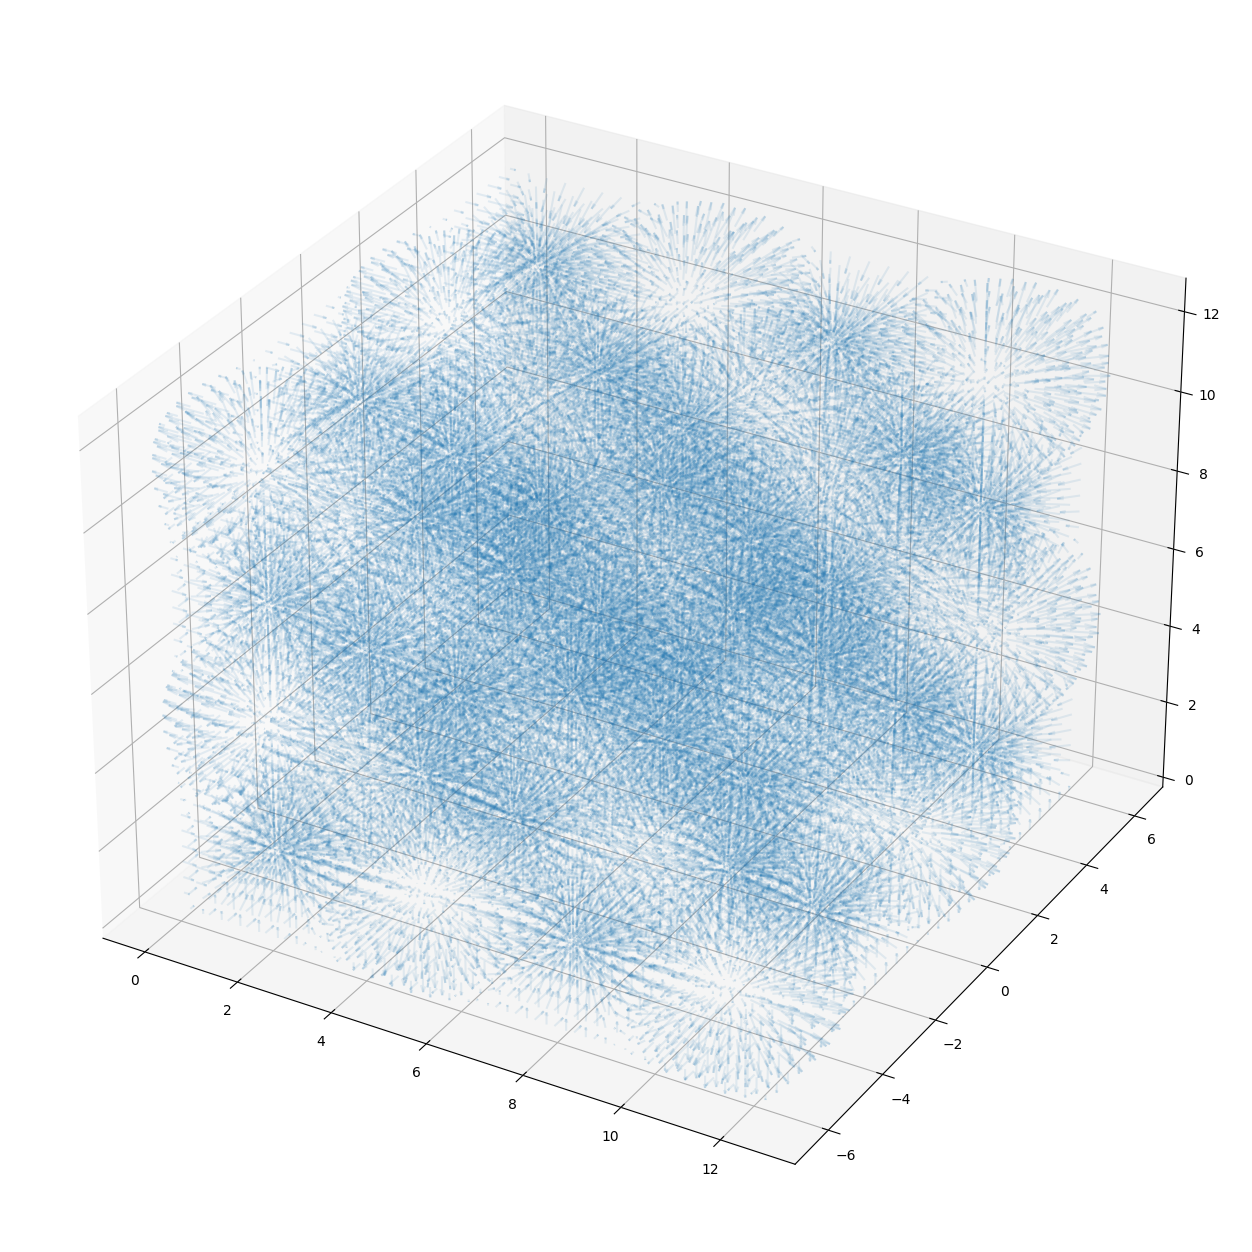

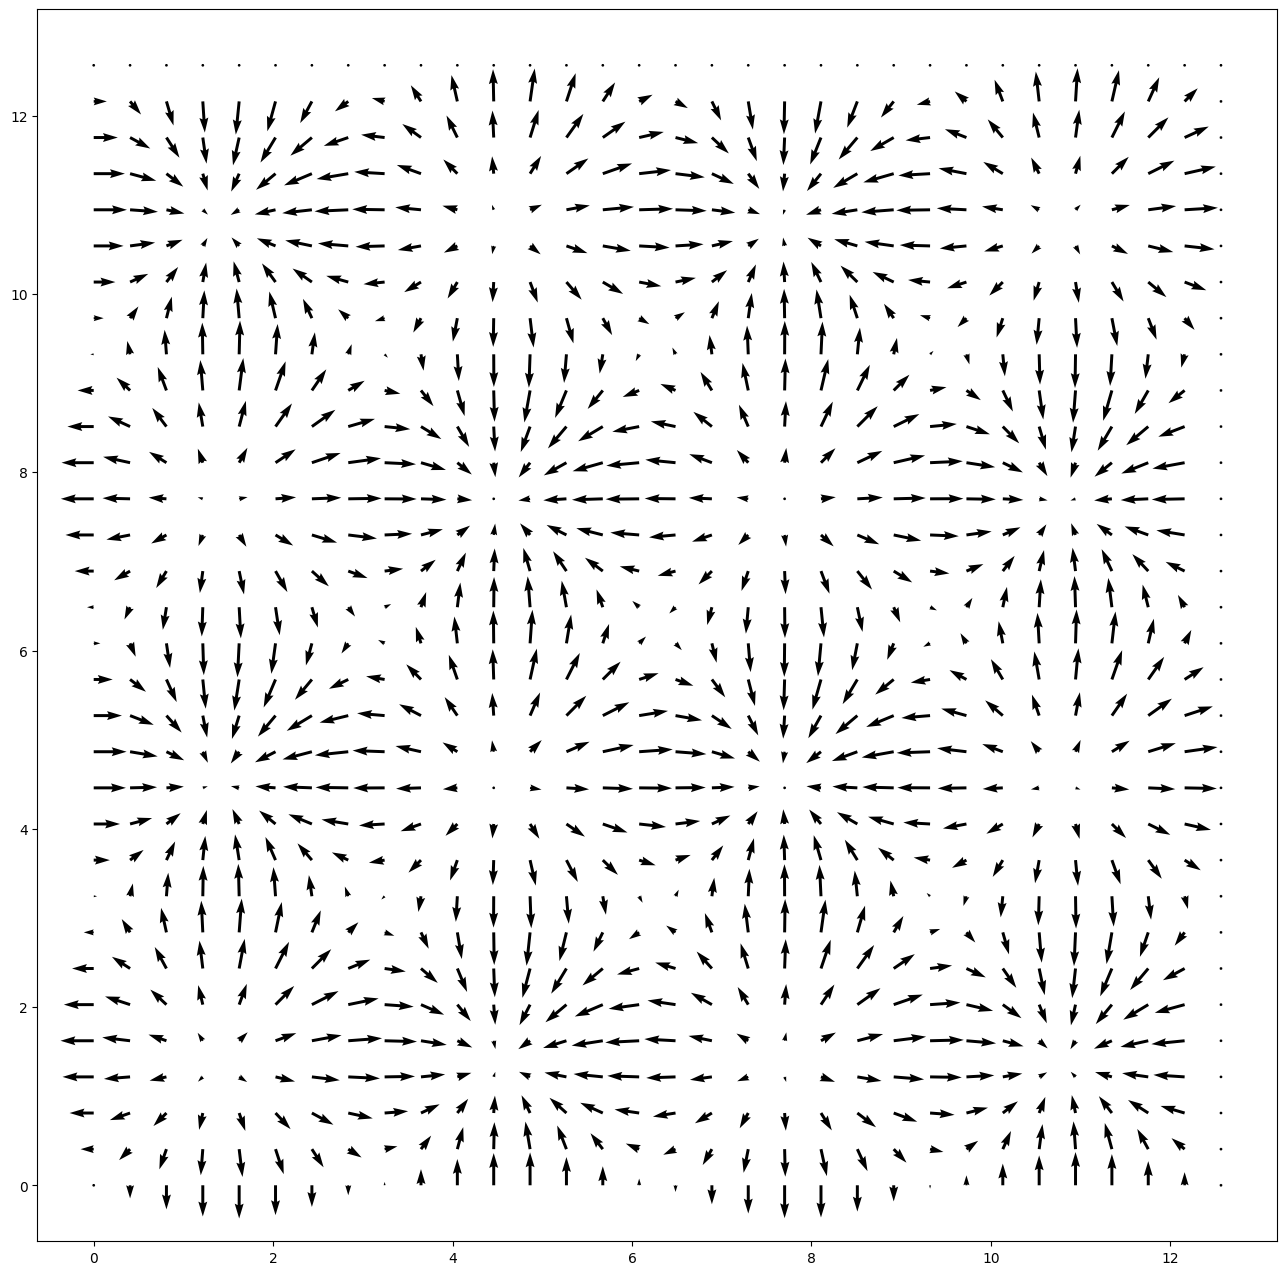

In [24]:
x, y, z = (0,4*np.pi), (-2*np.pi,2*np.pi), (0,4*np.pi)
sp = [x,y,z]
sp = Space(sp, bins= (32,32,32))
grid = Gradient(func, sp)
cas = grid.Catesian()
Plot_Vector(sp, cas).plot_3D()
Plot_Vector(sp, cas).plot_2D(axis = 1, index = 10)

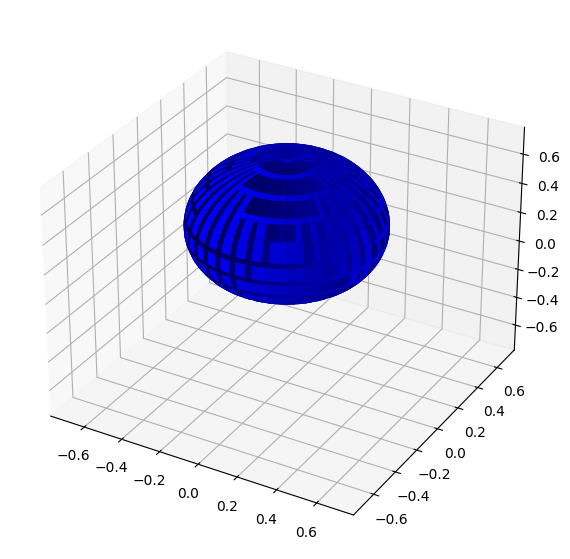

In [61]:
import numpy as np
from scipy.special import sph_harm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import cmath
plt.rcParams["animation.html"] = "jshtml"
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection='3d')

l = 0
m = 0
l2 = 1
m2 = 0
phi = np.linspace(0, np.pi , 150)
theta = phi = np.linspace(0, 2*np.pi , 150)

surf = ax.plot_surface(np.array([[]]), np.array([[]]), np.array([[]]))
ax.set_xlim([-0.75, 0.75])
ax.set_ylim([-0.75, 0.75])
ax.set_zlim([-0.75, 0.75])

def animate(i):
    global surf
    t = 2 * np.pi / nframes * i;
    X = abs(sph_harm(m, l, theta, phi)  + sph_harm(m2, l2, theta, phi) * cmath.exp(-t*1j)) * np.outer(np.cos(phi), np.sin(theta))
    Y = abs(sph_harm(m, l, theta, phi)  + sph_harm(m2, l2, theta, phi) * cmath.exp(-t*1j))* np.outer(np.sin(phi), np.sin(theta))
    Z = abs(sph_harm(m, l, theta, phi)  + sph_harm(m2, l2, theta, phi) * cmath.exp(-t*1j))* np.outer(np.ones(np.size(phi)), np.cos(theta))

    surf.remove()
    fig.canvas.draw()
    surf = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, color='b')
    plt.show()

nframes = 36
anim = FuncAnimation(fig, animate, frames=nframes+1, interval=2000/(nframes+1))
# matplotlib.animation.FuncAnimation(fig, anim, frames=200)

In [63]:
anim